In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv('avocado.csv', index_col = 'Date')

df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
drop_columns = ['Unnamed: 0', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']
avo_df = df.drop(drop_columns, axis=1)

avo_df.head()

,AveragePrice,Total Volume,year,region
Date,,,,
2015-12-27,1.33,64236.62,2015,Albany
2015-12-20,1.35,54876.98,2015,Albany
2015-12-13,0.93,118220.22,2015,Albany
2015-12-06,1.08,78992.15,2015,Albany
2015-11-29,1.28,51039.60,2015,Albany


In [6]:
avo_df['AveragePrice'].describe() 

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [7]:
print('Median price:' , avo_df['AveragePrice'].median())

Median price: 1.37


(array([  64.,  267.,  860., 1772., 2409., 2415., 2191., 2315., 1931.,
        1481., 1051.,  621.,  352.,  246.,   92.,   85.,   47.,   39.,
           8.,    3.]),
 array([0.44  , 0.5805, 0.721 , 0.8615, 1.002 , 1.1425, 1.283 , 1.4235,
        1.564 , 1.7045, 1.845 , 1.9855, 2.126 , 2.2665, 2.407 , 2.5475,
        2.688 , 2.8285, 2.969 , 3.1095, 3.25  ]),
 <a list of 20 Patch objects>)

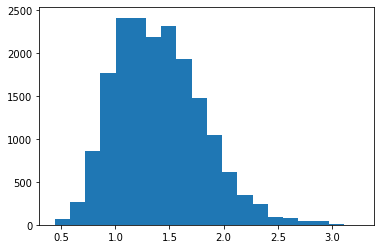

In [8]:
plt.hist(avo_df["AveragePrice"], bins=20)

In [9]:
regions = avo_df.region.unique()
regions

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [10]:
group_by_region = avo_df.groupby(by=['region'])
avo_df_avg = group_by_region.mean()
avo_df_avg = avo_df_avg.drop(['year'], axis=1)

avo_df_avg.head()

,AveragePrice,Total Volume
region,,
Albany,1.561036,47537.869734
Atlanta,1.337959,262145.322041
BaltimoreWashington,1.534231,398561.891479
Boise,1.348136,42642.567308
Boston,1.530888,287792.854527


In [14]:
from geopy.geocoders import Bing
from geopy.extra.rate_limiter import RateLimiter
geolocator = Bing(api_key='ApxLuramuz441u7DhIjLsoVIxufcTWRa09sKB1jr5ZKu55P02CCvIPAu_VSHwKQo', timeout=30)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)
regions_dict = {i : geolocator.geocode(i) for i in regions}
regions_dict

{'Albany': Location(Albany, NY, United States, (42.65172576904297, -73.75509643554688, 0.0)),
 'Atlanta': Location(Atlanta, GA, United States, (33.7485466003418, -84.3915023803711, 0.0)),
 'BaltimoreWashington': Location(MD, United States, (39.175262451171875, -76.67152404785156, 0.0)),
 'Boise': Location(Boise, ID, United States, (43.61579132080078, -116.20157623291016, 0.0)),
 'Boston': Location(Boston, MA, United States, (42.35899353027344, -71.05863189697266, 0.0)),
 'BuffaloRochester': Location(Rochester, NY, United States, (43.15570831298828, -77.612548828125, 0.0)),
 'California': Location(CA, United States, (37.25467300415039, -119.61727905273438, 0.0)),
 'Charlotte': Location(Charlotte, NC, United States, (35.223785400390625, -80.84114074707031, 0.0)),
 'Chicago': Location(Chicago, IL, United States, (41.88322830200195, -87.63240051269531, 0.0)),
 'CincinnatiDayton': Location(Cincinnati, OH, United States, (39.10369873046875, -84.51361083984375, 0.0)),
 'Columbus': Location(Co

In [44]:
regions_df = pd.DataFrame(regions_dict)
regions_df_melted = regions_df.iloc[1:2,:].melt()
regions_df_melted.columns = ['region', 'co-ordinates']

In [47]:
df = pd.merge(avo_df_avg, regions_df_melted, left_on='region', right_on='region')

df.head()

,region,AveragePrice,Total Volume,co-ordinates
0,Albany,1.561036,47537.869734,"(42.65172576904297, -73.75509643554688)"
1,Atlanta,1.337959,262145.322041,"(33.7485466003418, -84.3915023803711)"
2,BaltimoreWashington,1.534231,398561.891479,"(39.175262451171875, -76.67152404785156)"
3,Boise,1.348136,42642.567308,"(43.61579132080078, -116.20157623291016)"
4,Boston,1.530888,287792.854527,"(42.35899353027344, -71.05863189697266)"


In [52]:
df[['latitude', 'longitude']] = pd.DataFrame(df['co-ordinates'].tolist(), index=df.index)
df.head()

,region,AveragePrice,Total Volume,co-ordinates,latitude,longitude,geometry
0,Albany,1.561036,47537.869734,"(42.65172576904297, -73.75509643554688)",42.651726,-73.755096,POINT (-73.75510 42.65173)
1,Atlanta,1.337959,262145.322041,"(33.7485466003418, -84.3915023803711)",33.748547,-84.391502,POINT (-84.39150 33.74855)
2,BaltimoreWashington,1.534231,398561.891479,"(39.175262451171875, -76.67152404785156)",39.175262,-76.671524,POINT (-76.67152 39.17526)
3,Boise,1.348136,42642.567308,"(43.61579132080078, -116.20157623291016)",43.615791,-116.201576,POINT (-116.20158 43.61579)
4,Boston,1.530888,287792.854527,"(42.35899353027344, -71.05863189697266)",42.358994,-71.058632,POINT (-71.05863 42.35899)


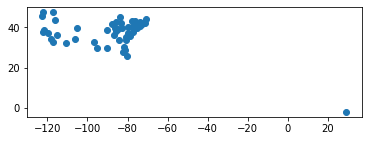

In [53]:
avo_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

avo_gdf.plot()